- collection of decision trees
- ensemble algorithm
- bagging and boosting
- maxvoting: the decision tree with the maximum trees is chosen
- each decision tree works on one subset of the dataset(prevents overfitting)
- black box model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot

In [3]:
df = pd.read_csv('/content/temps.csv')

In [4]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [5]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     348 non-null    int64  
 1   month    348 non-null    int64  
 2   day      348 non-null    int64  
 3   week     348 non-null    object 
 4   temp_2   348 non-null    int64  
 5   temp_1   348 non-null    int64  
 6   average  348 non-null    float64
 7   actual   348 non-null    int64  
 8   friend   348 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.6+ KB


In [7]:
df.shape

(348, 9)

In [8]:
df.isna().sum()

year       0
month      0
day        0
week       0
temp_2     0
temp_1     0
average    0
actual     0
friend     0
dtype: int64

In [9]:
df = pd.get_dummies(df, columns=['week'])

In [10]:
df.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [11]:
df.shape

(348, 15)

In [12]:
df.dtypes

year            int64
month           int64
day             int64
temp_2          int64
temp_1          int64
average       float64
actual          int64
friend          int64
week_Fri        uint8
week_Mon        uint8
week_Sat        uint8
week_Sun        uint8
week_Thurs      uint8
week_Tues       uint8
week_Wed        uint8
dtype: object

In [13]:
X = df.drop('actual',axis = 1)
feature_list = list(X.columns)

In [14]:
X = np.array(X)
X

array([[2.016e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.016e+03, 1.200e+01, 2.900e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 3.100e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [15]:
y= df['actual']

In [16]:
y = np.array(y)
y

array([45, 44, 41, 40, 44, 51, 45, 48, 50, 52, 45, 49, 55, 49, 48, 54, 50,
       54, 48, 52, 52, 57, 48, 51, 54, 56, 57, 56, 52, 48, 47, 46, 51, 49,
       49, 53, 49, 51, 57, 62, 56, 55, 58, 55, 56, 57, 53, 51, 53, 51, 51,
       60, 59, 61, 60, 57, 53, 58, 55, 59, 57, 64, 60, 53, 54, 55, 56, 55,
       52, 54, 49, 51, 53, 58, 63, 61, 55, 56, 57, 53, 54, 57, 59, 51, 56,
       64, 68, 73, 71, 63, 69, 60, 57, 68, 77, 76, 66, 59, 58, 60, 59, 59,
       60, 68, 77, 89, 81, 81, 73, 64, 65, 55, 59, 60, 61, 64, 61, 68, 77,
       87, 74, 60, 68, 77, 82, 63, 67, 75, 81, 77, 82, 65, 57, 60, 71, 64,
       63, 66, 59, 66, 65, 66, 66, 65, 64, 64, 64, 71, 79, 75, 71, 80, 81,
       92, 86, 85, 67, 65, 67, 65, 70, 66, 60, 67, 71, 67, 65, 70, 76, 73,
       75, 68, 69, 71, 78, 85, 79, 74, 73, 76, 76, 71, 68, 69, 76, 68, 74,
       71, 74, 74, 77, 75, 77, 76, 72, 80, 73, 78, 82, 81, 71, 75, 80, 85,
       79, 83, 85, 88, 76, 73, 77, 73, 75, 80, 79, 72, 72, 73, 72, 76, 80,
       87, 90, 83, 84, 81

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [18]:
X_train.shape

(261, 14)

In [19]:
X_test.shape

(87, 14)

In [20]:
y_train.shape

(261,)

In [21]:
y_test.shape

(87,)

In [22]:
rf = RandomForestRegressor(n_estimators = 1000,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [23]:
y_pred = rf.predict(X_test)
y_pred

array([68.546, 60.784, 51.793, 60.927, 65.881, 70.528, 80.896, 78.619,
       62.719, 73.128, 63.602, 72.64 , 38.659, 62.429, 71.211, 56.202,
       60.822, 56.842, 57.348, 76.862, 64.103, 54.39 , 65.619, 62.349,
       58.085, 52.536, 67.117, 47.089, 61.673, 78.307, 73.671, 64.337,
       55.865, 80.073, 73.967, 61.824, 53.672, 50.83 , 68.275, 43.457,
       70.446, 57.512, 76.381, 42.691, 61.097, 73.52 , 52.555, 79.064,
       54.275, 42.529, 46.701, 42.727, 64.663, 65.748, 74.633, 61.44 ,
       55.451, 59.685, 53.377, 59.33 , 66.457, 50.433, 60.308, 70.522,
       59.998, 58.837, 71.399, 69.518, 75.912, 40.739, 78.394, 56.005,
       60.448, 49.8  , 54.326, 63.446, 43.876, 76.366, 48.199, 52.312,
       53.308, 68.748, 73.033, 73.27 , 63.059, 58.739, 46.929])

In [24]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None , min_samples_split = 2, min_samples_leaf = 1)

In [25]:
errors = abs(y_pred - y_test)
errors

array([ 2.546,  0.216,  0.207,  5.073,  4.119, 11.472,  4.104,  5.381,
        2.281, 18.872,  2.602, 12.36 ,  5.341,  2.571,  2.211,  5.798,
        3.178,  0.842,  4.348,  2.138,  1.103,  2.61 ,  1.381,  0.349,
        0.915,  3.464,  2.117,  4.911,  4.327,  2.307,  9.671,  3.337,
        7.865,  0.927,  3.033,  4.824,  4.328,  3.83 ,  0.275,  7.543,
        6.554,  1.512,  3.381,  8.309,  2.097, 13.48 ,  5.445,  1.936,
        3.725,  0.529,  2.299,  2.727,  0.337,  1.748,  4.633,  3.56 ,
        2.451,  2.685,  0.377,  0.67 ,  0.543,  1.433,  7.308,  1.522,
        4.998,  9.163,  4.601,  0.518,  2.088,  4.739,  4.394,  0.995,
        8.552,  0.2  ,  1.674,  3.554,  4.124,  3.634,  0.199,  3.312,
        3.692,  8.252,  7.967,  6.27 ,  2.941,  1.739,  1.929])

In [26]:
mae = round(np.mean(errors), 2)
mae

3.83

In [31]:
tree = rf.estimators_[5]
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [30]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train,y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [33]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.69
Variable: average              Importance: 0.2
Variable: day                  Importance: 0.03
Variable: friend               Importance: 0.03
Variable: temp_2               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


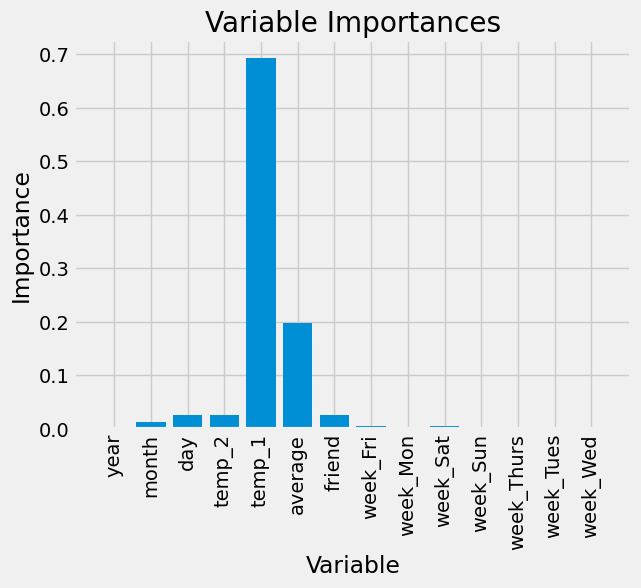

In [35]:
%matplotlib inline
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

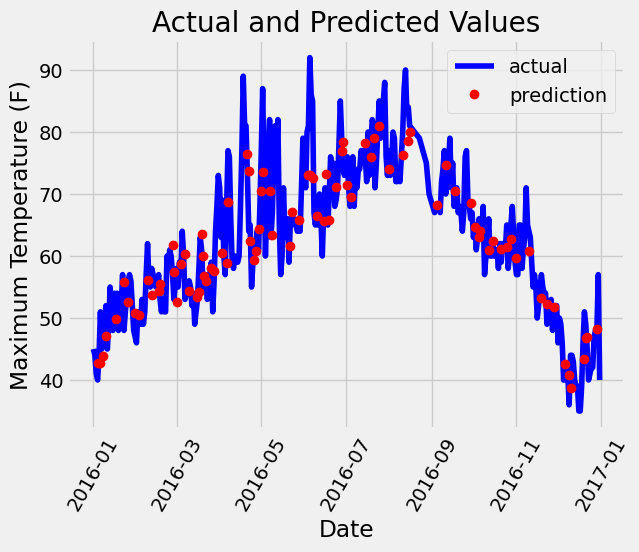

In [41]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = X[:, feature_list.index('month')]
days = X[:, feature_list.index('day')]
years = X[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': y})
# Dates of predictions
months = X_test[:, feature_list.index('month')]
days = X_test[:, feature_list.index('day')]
years = X_test[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction':y_pred})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = 60)
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

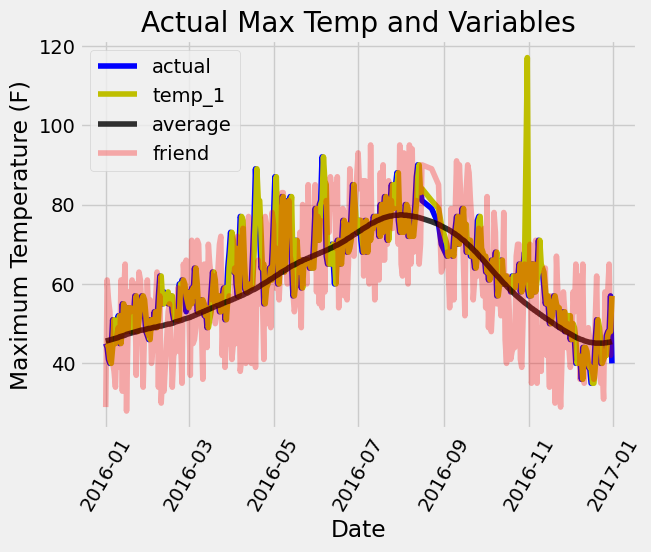

In [43]:
# Make the data accessible for plotting
true_data['temp_1'] = X[:, feature_list.index('temp_1')]
true_data['average'] = X[:, feature_list.index('average')]
true_data['friend'] = X[:, feature_list.index('friend')]
# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)
# Formatting plot
plt.legend(); plt.xticks(rotation = 60)
# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');